In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

## Purpose

Our purpose is to understand the effects of the `concentration grant` on academic performance. 

## <s>Structure</s> (outdated)
The general structure of the dataset is as follows:

- **county**<br>
    
_58 in the state - top level deliniator._
    
    
- county    
    - **school district**<br>
    
_Within each county, a number of school districts. We have demographic profiles of each district that we can use in the matching process, if applicable._
    
    
- county    
    - school district    
        - **student group**<br>
        
_Further, the grade data breaks down into 17 student groups per district. Using this we can query academic performance by a specific group._
        
        
- county    
    - school district    
        - student group
            - **math grades**
            - **english grades**<br>
            
_Finally, the specific math and english grades lie at the bottom of the data structure._ 

In [3]:
gdf

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District C,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,0.335,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,0.304,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018

We have the Unduplicated Pupil Count (UPC), the share of students which qualify as high needs as defined under California SB-97, the Local Control Funding Formula, from two data sources. `UPpct` is the UPC as defined by the attributes dataset. From the source [website](https://gis.data.ca.gov/datasets/e9476c422f0842a7a38652aaf4c7597c_0?geometry=-146.710%2C31.049%2C-91.295%2C43.258):

> Boundary lines are maintained by the California Department of Education (CDE) and are effective in the 2018-19 academic year . The CDE works collaboratively with the US Census Bureau to update and maintain boundary information as part of the federal School District Review Program (SDRP). 

The second variable, `unduplicat` comes from the [LCFF funding snapshot](https://ias.cde.ca.gov/lcffsnapshot/lcff.aspx), which is less recent, without the collaboration of the census, and lacks the polish that the collaboration brought. 

Our issue is that `UPpct` and `unduplicat` are different values, despite representing the same variable.

In [4]:
gdf.UPpct

0      0.335
1      0.304
2      0.334
3      0.296
4      0.831
       ...  
939    0.812
940    0.816
941    0.387
942    0.486
943    0.446
Name: UPpct, Length: 944, dtype: float64

In [5]:
gdf.unduplicat

0      0.3486
1      0.2833
2      0.3519
3      0.2904
4      0.7953
        ...  
939    0.6988
940    0.8168
941    0.3868
942    0.4783
943    0.4283
Name: unduplicat, Length: 944, dtype: float64

In [6]:
gdf['UPdiff'] = gdf['UPpct'] - gdf['unduplicat']
print(gdf['UPdiff'])

0     -0.0136
1      0.0207
2     -0.0179
3      0.0056
4      0.0357
        ...  
939    0.1132
940   -0.0008
941    0.0002
942    0.0077
943    0.0177
Name: UPdiff, Length: 944, dtype: float64


In [7]:
pd.Series.mean(gdf['UPdiff'])

0.006848198789358151

On average, the difference between `UPpct` and `unduplicat` are very small. We will consider both variables in sensitivity analyses just to be safe.

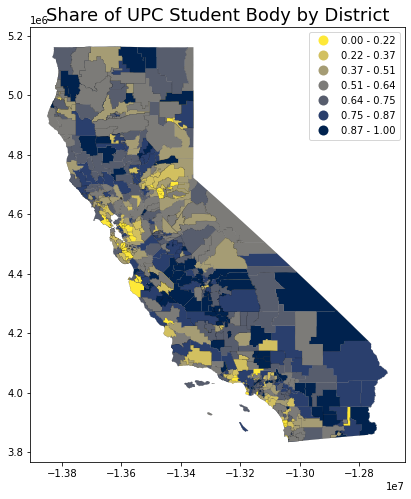

In [8]:
f, ax = plt.subplots(figsize  = (12, 8))

ax.set_title("Share of UPC Student Body by District", fontsize=18)

gdf.plot(
    column='UPpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

The classification scheme impacts the visualization. Rather than using a standardized scheme, it might make more sense to use a user-defined classification to better distinguish districts that recieve concentration grants from districts that do not. That determining factor is the `unduplicated pupil count` or *UPC* of students which are disadvantaged in at least one of a few defined ways. A share of UPC of 0.55 or higher means that the district recieves a concentration grant. 

A user-defined classification to capture the cutoff for reciept of a concentration grant might look like this:
- 0 -> 0.10
- 0.10 -> 0.25
- 0.25 -> 0.5499
- 0.55 -> 0.70
- 0.70 -> 1.0

In [9]:
x = (gdf['UPpct'])
# setting variable of interest
bins_list = [0.10, 0.25, 0.5499, 0.7, 1]
# setting bins
cm = plt.cm.cividis_r
# seting colormap

In [16]:
from legendgram import legendgram
import palettable.matplotlib as palmpl

(0.0, 1.0, 0.0, 1.0)

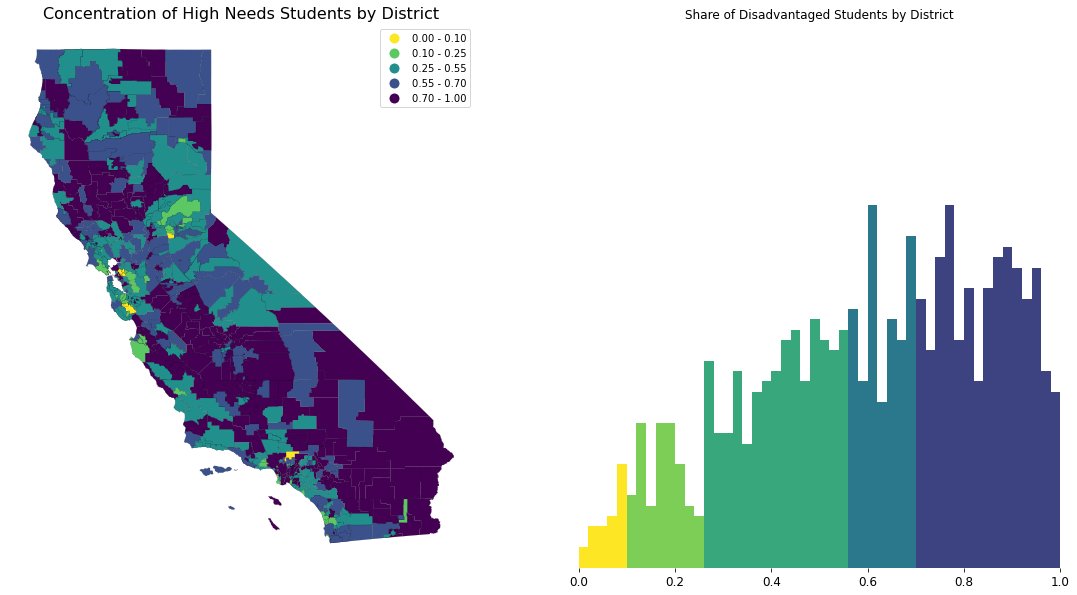

In [49]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(19,10))

plt.title('Share of Disadvantaged Students by District')

gdf.plot(
    column='UPpct',
    legend=True,
    scheme='userdefined',
    classification_kwds={'bins':bins_list},
    linewidth=.1,
    edgecolor='black',
    cmap='viridis_r',
    ax=ax1
        )
ax1.set_title("Concentration of High Needs Students by District", fontsize=16)
# title for map

legendgram(f,ax2,x.values,bins_list,pal=palmpl.Viridis_5_r,
               legend_size=(1,.7), # legend size in fractions of the axis
               loc = 'lower left', # matplotlib-style legend locations
               clip = (0,1) # clip the displayed range of the histogram
               )

ax1.axis("off")
ax2.axis("off")

- What are the demographic makeups of each bin?

the darker polygons indicate a higher share of UPC, while the lighter districts have a lesser concentration of disadvantaged students. What happens if we further divide the top bin, the districts with the smallest share of UPC?

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='UPpct',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.05, 0.1, 0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

This reveals that there are fewer highly priviledged/homogenized districts than the previous visualization led us to believe, but there are still some. It looks like the marjority of priviledged districts are somwhere between the `0.1` and `0.25` range of UPC.

Now lets put the original Fisher Jenks classification next to our user-defined 4-bin classification scheme.

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
#two plots breaks title

gdf.plot(
    column='UPpct',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

gdf.plot(
    column='UPpct',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )
# ax.set_title("Share of UPC Concentration, Fisher Jenks vs User Defined Classes")
# two plots side by side PogU

## adding county boundaries

[link to source](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-county-boundaries?geometry=-146.710%2C31.049%2C-91.295%2C43.258)

[geopandas docs](https://geopandas.org/mapping.html)

In [ ]:
counties = gpd.read_file("raw_data/cnty19_1.shp")

In [ ]:
counties.plot()

In [ ]:
counties.head()

In [ ]:
counties['geometry'].crs
# thankfully the same as our dataset 

In [ ]:
gdf['geometry'].crs
# see, I told you

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

gdf.plot(column='UPpct',
        legend=True,
        scheme='userdefined',
        classification_kwds={'bins':bins_list},
        linewidth=.1,
        edgecolor='white',
        cmap='cividis_r',
        ax=ax)

counties.boundary.plot(facecolor='none',
                       edgecolor='black',
                       linewidth=.75,
                       ax=ax)

# that was easy, actually

Do I need to merge the county boundaries in? 